# Cytokine Chronic Pain ML

In [1]:
import os
import pandas as pd
import numpy as np
import re

from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor as GBM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
#from glmnet import LogitNet
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
#from glmnet import LogitNet
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GMM

from matplotlib.backends.backend_pdf import PdfPages


/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
from Functions import *

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.tree import DecisionTreeClassifier


In [4]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#!pip install pydotplus
import pydotplus


In [5]:
path="/Users/michaelallwright/Dropbox (Sydney Uni)/michael_PhD/Projects/MISC/Paul CRPS DPN CYTOKINE ASSAYS/Data/"
file="CRPS + DPN Cytokine assays.csv"
filedpn="DPN Cytokine assays.csv"

In [6]:
df=pd.read_csv("%s%s" % (path,file),sep=',') 
dpn=pd.read_csv("%s%s" % (path,filedpn),sep=',') 
crps=pd.read_csv("%s%s" % (path,"CRPS + DPN Cytokine assays + Trytophan metabolites + Immune cell data.csv"),sep=',')

In [7]:
crps_mod=crps[["GM-CSF (20)","IL-37 (34)","Treg population","CD8+ Tcm population",'TRP', 'sVEGFR3 (61)',"Type"]][(crps["Type"]=="CRP")|
                                                                                          (crps["Type"]=="C")]
crps_mod.shape

(30, 7)

#### Drop Nulls

In [8]:
crps_mod=crps_mod.dropna()
crps_mod.shape

(27, 7)

In [9]:
#crps_less=crps[(crps["Type"]=="CRP")|(crps["Type"]=="C")]

In [10]:
#crps_mod2["CD8+ Tcm population"]
#crps_mod2['CD*PopnH']=0
#crps_mod2['CD*PopnH'][(crps_mod2["CD8+ Tcm population"]>10000)]=1


In [11]:
#crps_mod['GM-CSF (20)'].sample(20)

In [12]:
crps.columns

Index(['Sample', 'Type', 'GM-CSF (20)', 'IFNy (25)', 'IL-1B (46)', 'IL-2 (48)',
       'IL-4 (53)', 'IL-5 (55)', 'IL-6 (57)', 'IL-8 (63)', 'IL-10 (27)',
       'IL-12(p70) (33)', 'IL-13 (35)', 'IL-17A (39)', 'IL-23 (54)',
       'TNFa (75)', 'IL-37 (34)', 'sEGFR (14)', 'sgp130 (18)', 'sIL-1RI (20)',
       'sIL-1RII (22)', 'sIL-2Ra (33)', 'sIL-4R (35)', 'sIL-6R (37)',
       'sRAGE (39)', 'sTNFRI (51)', 'sTNFRII (53)', 'sVEGFR1 (55)',
       'sVEGFR2 (57)', 'sVEGFR3 (61)', 'TRP', 'KYN', '3-HAA', 'AA', '3-HK',
       'XA', 'KYNA', 'PIC', 'QUIN', 'NEO', 'BH4', 'KYNA/KYN ratio (*100)',
       'AA/KYN ratio (*100)', 'XA/KYN ratio (*100)', '3-HAA/KYN ratio (*100)',
       'PIC/KYN ratio (*100)', 'QUIN/KYN ratio (*100)', 'IDO', 'KMO', 'KAT A',
       'KAT B', 'total KAT', 'KYNU A', 'KYNU B', 'total KYNU',
       'XA / 3-HK ratio', '3-HAA/3-HK ratio', 'KYNA / 3-HK ratio',
       'KYN/TRP ratio (x100)', '3-HAA/AA ratio', 'CD4+ Tcm population',
       'Tbet population', 'Tbet NFkB', 'Treg popul

In [13]:
crps_mod['IL37L']=0
crps_mod['IL37L'][(crps_mod['IL-37 (34)']<31)]=1
crps_mod['GMCSF_High']=0
crps_mod['GMCSF_High'][(crps_mod['GM-CSF (20)']>170)]=1
crps_mod['TregPopnH']=0
crps_mod['TregPopnH'][(crps_mod['Treg population']>5000)]=1
crps_mod['CD*PopnH']=0
crps_mod['CD*PopnH'][(crps_mod["CD8+ Tcm population"]>10000)]=1


In [14]:
crps_mod['Type'].value_counts()

C      14
CRP    13
Name: Type, dtype: int64

In [28]:
crps.columns

Index(['Sample', 'Type', 'GM-CSF (20)', 'IFNy (25)', 'IL-1B (46)', 'IL-2 (48)',
       'IL-4 (53)', 'IL-5 (55)', 'IL-6 (57)', 'IL-8 (63)', 'IL-10 (27)',
       'IL-12(p70) (33)', 'IL-13 (35)', 'IL-17A (39)', 'IL-23 (54)',
       'TNFa (75)', 'IL-37 (34)', 'sEGFR (14)', 'sgp130 (18)', 'sIL-1RI (20)',
       'sIL-1RII (22)', 'sIL-2Ra (33)', 'sIL-4R (35)', 'sIL-6R (37)',
       'sRAGE (39)', 'sTNFRI (51)', 'sTNFRII (53)', 'sVEGFR1 (55)',
       'sVEGFR2 (57)', 'sVEGFR3 (61)', 'TRP', 'KYN', '3-HAA', 'AA', '3-HK',
       'XA', 'KYNA', 'PIC', 'QUIN', 'NEO', 'BH4', 'KYNA/KYN ratio (*100)',
       'AA/KYN ratio (*100)', 'XA/KYN ratio (*100)', '3-HAA/KYN ratio (*100)',
       'PIC/KYN ratio (*100)', 'QUIN/KYN ratio (*100)', 'IDO', 'KMO', 'KAT A',
       'KAT B', 'total KAT', 'KYNU A', 'KYNU B', 'total KYNU',
       'XA / 3-HK ratio', '3-HAA/3-HK ratio', 'KYNA / 3-HK ratio',
       'KYN/TRP ratio (x100)', '3-HAA/AA ratio', 'CD4+ Tcm population',
       'Tbet population', 'Tbet NFkB', 'Treg popul

In [31]:
borvars=crps[['sTNFRI (51)', 'TRP', 'Tbet population', 'Tbet NFkB', 'Treg NFkB', 'Treg PLCg2', 'CD8+ Tcm population', 'CD8+ Tcm NFkB','Type']].dropna()
borvars2=crps[["TRP","CD4+ Tcm population" ,"Tbet population","Tbet NFkB", "Treg NFkB", "Treg PLCg2","CD8+ Tcm NFkB","Type"]].dropna()

In [34]:
allvars=crps.drop(['Sample'],axis=1).dropna()
X_s1_df=allvars.drop(['Type'],axis=1)
X_s1=np.asarray(allvars.drop(['Type'],axis=1))
y_s1=np.asarray(allvars['Type'])
X_s2=np.asarray(crps_mod[['IL-37 (34)','GM-CSF (20)','Treg population',"CD8+ Tcm population"]])
X_s3=np.asarray(crps_mod[['GMCSF_High','IL37L','CD*PopnH','TregPopnH']])

X_s4=np.asarray(borvars[['sTNFRI (51)', 'TRP', 'Tbet population', 'Tbet NFkB', 'Treg NFkB', 'Treg PLCg2', 'CD8+ Tcm population', 'CD8+ Tcm NFkB']].dropna())
X_s5=np.asarray(borvars2[["TRP","CD4+ Tcm population" ,"Tbet population","Tbet NFkB", "Treg NFkB", "Treg PLCg2","CD8+ Tcm NFkB"]].dropna())

y_s4=np.asarray(borvars['Type'])
y_s5=np.asarray(borvars2['Type'])
print(len(X_s4))
y_s2s3=np.asarray(crps_mod['Type'])


26


In [18]:
#Output to rerun Boruta in R

In [19]:
allvars.to_csv('%s%s' % (path,"mod_data_cy.csv"))

In [20]:
features = [f for f in X_s1_df.columns ]
len(features)

68

In [35]:
scaler = StandardScaler()
sf1=scaler.fit(X_s1)
X_s1_s=sf1.transform(X_s1)

sf2=scaler.fit(X_s2)
X_s2_s=sf2.transform(X_s2)

sf3=scaler.fit(X_s3)
X_s3_s=sf3.transform(X_s3)

sf4=scaler.fit(X_s4)
X_s3_4=sf4.transform(X_s4)

sf5=scaler.fit(X_s5)
X_s3_5=sf5.transform(X_s5)





Try logistic regression 50 times

In [36]:
from sklearn.metrics import accuracy_score

def trainmodel(X,y,model,desc):  
    reps=500
    auc_tot=0
    accs_tot=0
    auc_tot_arr=np.array([])
    mod_arr=np.array([])
    for i in range(reps):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        model.fit(X_train,y_train)
        probs = model.predict_proba(X_test)
        preds = model.predict(X_test)
        #print(preds)
        probs = probs[:, 1]
        y_vals=np.where(y_test=="CRP", 1, 0)
        preds=np.where(preds=="CRP", 1, 0)
        auc = roc_auc_score(y_vals, probs)
        accs=accuracy_score(preds, y_vals)
        auc_tot=auc_tot+auc
        accs_tot=accs_tot+accs
        auc_avg=auc_tot/(i+1)
        accs_avg=accs_tot/(i+1)
        auc_tot_arr=np.append(auc_tot_arr,auc)
        mod_arr=np.append(mod_arr,desc)
        #print(auc)
        #print(auc_avg)
    mod_data=pd.DataFrame({'Model':mod_arr,'auc':auc_tot_arr})
    print(desc)
    print('AUC avg: %.2f' % auc_avg)
    print('Acc avg: %.2f' % accs_avg)
    return mod_data

In [37]:
accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))

0.5

In [24]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 50, perc = 90)
boruta_feature_selector.fit(X_s1, y_s1)

Iteration: 	1 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	2 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	3 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	4 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	5 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	6 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	7 / 50
Confirmed: 	0
Tentative: 	68
Rejected: 	0
Iteration: 	8 / 50
Confirmed: 	0
Tentative: 	16
Rejected: 	52
Iteration: 	9 / 50
Confirmed: 	5
Tentative: 	11
Rejected: 	52
Iteration: 	10 / 50
Confirmed: 	5
Tentative: 	11
Rejected: 	52
Iteration: 	11 / 50
Confirmed: 	5
Tentative: 	11
Rejected: 	52
Iteration: 	12 / 50
Confirmed: 	7
Tentative: 	9
Rejected: 	52
Iteration: 	13 / 50
Confirmed: 	7
Tentative: 	9
Rejected: 	52
Iteration: 	14 / 50
Confirmed: 	7
Tentative: 	9
Rejected: 	52
Iteration: 	15 / 50
Confirmed: 	7
Tentative: 	9
Rejected: 	52
Iteration: 	16 / 50
Confirmed: 	7
Tentative: 	7
Rejected: 	54
Iteration: 	1

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=97, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x1a230afaf8>,
            verbose=0, warm_start=False),
     max_iter=50, n_estimators='auto', perc=90,
     random_state=<mtrand.RandomState object at 0x1a230afaf8>,
     two_step=True, verbose=2)

In [25]:
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['sTNFRI (51)', 'TRP', 'Tbet population', 'Tbet NFkB', 'Treg NFkB', 'Treg PLCg2', 'CD8+ Tcm population', 'CD8+ Tcm NFkB']


In [26]:
boruta_feature_selector.ranking_

array([34,  8, 48, 24, 55, 30, 14, 25, 45, 25, 33, 27, 22, 11,  5, 54, 22,
       20, 35, 10,  4, 17,  9,  1, 51, 18, 39,  2,  1,  6, 36, 58, 45, 30,
       36, 41, 14, 11, 20, 43, 57, 38, 28,  3, 14, 32, 28, 41, 40, 55, 53,
       49, 44, 51, 51,  7, 18, 47,  2,  1,  1, 14,  1,  1,  1,  1,  2,  2])

In [40]:
lrs1=trainmodel(X_s1,y_s1,LogisticRegression(random_state=0, solver='lbfgs'),"Logistic Regression Set 1")
dts1=trainmodel(X_s1,y_s1,DecisionTreeClassifier(),"Decision Tree Set 1")
xgs1=trainmodel(X_s1,y_s1,XGBClassifier(),"XGB Classifier Set 1")

lrs2=trainmodel(X_s2,y_s2s3,LogisticRegression(random_state=0, solver='lbfgs'),"Logistic Regression Set 2")
dts2=trainmodel(X_s2,y_s2s3,DecisionTreeClassifier(),"Decision Tree Set 2")
xgs2=trainmodel(X_s2,y_s2s3,XGBClassifier(),"XGB Classifier Set 2")

lrs3=trainmodel(X_s3,y_s2s3,LogisticRegression(random_state=0, solver='lbfgs'),"Logistic Regression Set 3")
dts3=trainmodel(X_s3,y_s2s3,DecisionTreeClassifier(),"Decision Tree Set 3")
xgs3=trainmodel(X_s3,y_s2s3,XGBClassifier(),"XGB Classifier Set 3")

lrs4=trainmodel(X_s4,y_s4,LogisticRegression(random_state=0, solver='lbfgs'),"Logistic Regression Set 4")
dts4=trainmodel(X_s4,y_s4,DecisionTreeClassifier(),"Decision Tree Set 4")
xgs4=trainmodel(X_s4,y_s4,XGBClassifier(),"XGB Classifier Set 4")

lrs4=trainmodel(X_s4,y_s4,LogisticRegression(random_state=0, solver='lbfgs'),"Logistic Regression Set 4")
dts4=trainmodel(X_s4,y_s4,DecisionTreeClassifier(),"Decision Tree Set 4")
xgs4=trainmodel(X_s4,y_s4,XGBClassifier(),"XGB Classifier Set 4")

lrs4=trainmodel(X_s5,y_s5,LogisticRegression(random_state=0, solver='lbfgs'),"Logistic Regression Set 5")
dts4=trainmodel(X_s5,y_s5,DecisionTreeClassifier(),"Decision Tree Set 5")
xgs4=trainmodel(X_s5,y_s5,XGBClassifier(),"XGB Classifier Set 5")



Logistic Regression Set 1
AUC avg: 0.60
Acc avg: 0.57
Decision Tree Set 1
AUC avg: 0.57
Acc avg: 0.55
XGB Classifier Set 1
AUC avg: 0.59
Acc avg: 0.52
Logistic Regression Set 2
AUC avg: 0.58
Acc avg: 0.50
Decision Tree Set 2
AUC avg: 0.55
Acc avg: 0.53
XGB Classifier Set 2
AUC avg: 0.62
Acc avg: 0.55
Logistic Regression Set 3
AUC avg: 0.79
Acc avg: 0.61
Decision Tree Set 3
AUC avg: 0.71
Acc avg: 0.58
XGB Classifier Set 3
AUC avg: 0.72
Acc avg: 0.64
Logistic Regression Set 4
AUC avg: 0.81
Acc avg: 0.75
Decision Tree Set 4
AUC avg: 0.68
Acc avg: 0.67
XGB Classifier Set 4
AUC avg: 0.79
Acc avg: 0.66
Logistic Regression Set 4
AUC avg: 0.81
Acc avg: 0.74
Decision Tree Set 4
AUC avg: 0.69
Acc avg: 0.67
XGB Classifier Set 4
AUC avg: 0.78
Acc avg: 0.66
Logistic Regression Set 5
AUC avg: 0.88
Acc avg: 0.76
Decision Tree Set 5
AUC avg: 0.71
Acc avg: 0.70
XGB Classifier Set 5
AUC avg: 0.78
Acc avg: 0.66


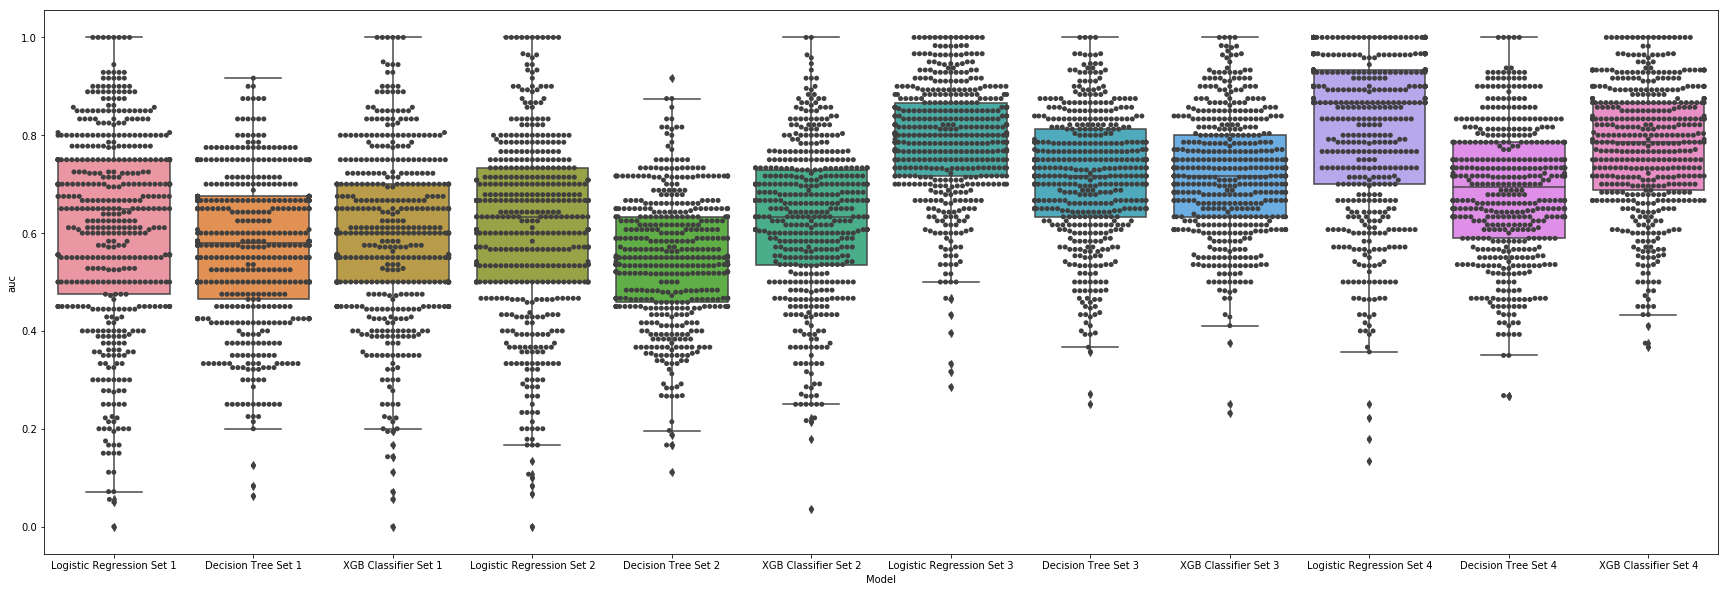

In [40]:
mod_data=pd.concat([lrs1,dts1,xgs1,lrs2,dts2,xgs2,lrs3,dts3,xgs3,lrs4,dts4,xgs4],axis=0)


fig = plt.figure(figsize=(30,10))
ax = sns.boxplot(x="Model",y="auc", data=mod_data)
ax = sns.swarmplot(x="Model",y="auc", data=mod_data, color=".25")
plt.show()

In [182]:
model=XGBClassifier()
    #model=LogisticRegression(random_state=0, solver='lbfgs')
X_train, X_test, y_train, y_test = train_test_split(X_r_s, y, test_size=0.5)
model.fit(X_train,y_train)
#print(model.coef_)
probs = model.predict_proba(X_test)
#pred = model.predict(X_test)

Manova on crps_mod

In [261]:
#!pip install --upgrade --no-deps statsmodels
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

In [262]:
crps2=crps.dropna()
#crps2

In [263]:
crps_sub=crps2[['GM-CSF (20)', 'IFNy (25)', 'IL-1B (46)', 'IL-2 (48)',
       'IL-4 (53)', 'IL-5 (55)', 'IL-6 (57)', 'IL-8 (63)', 'IL-10 (27)',
       'IL-12(p70) (33)', 'IL-13 (35)', 'IL-17A (39)', 'IL-23 (54)',
       'TNFa (75)', 'IL-37 (34)']]

y=np.asarray(crps2['Type'])

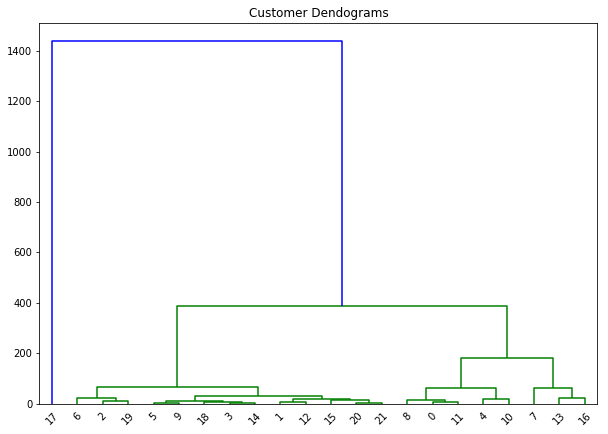

In [264]:
#maov = MANOVA.from_formula('GM-CSF (20) +  IL-37 (34)  ~ type', data=crps_mod)
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(crps_sub[['GM-CSF (20)', 'IFNy (25)','IL-1B (46)','IL-2 (48)']], method='ward'))
plt.show()

In [265]:
crps_sub.columns

Index(['GM-CSF (20)', 'IFNy (25)', 'IL-1B (46)', 'IL-2 (48)', 'IL-4 (53)',
       'IL-5 (55)', 'IL-6 (57)', 'IL-8 (63)', 'IL-10 (27)', 'IL-12(p70) (33)',
       'IL-13 (35)', 'IL-17A (39)', 'IL-23 (54)', 'TNFa (75)', 'IL-37 (34)'],
      dtype='object')

In [267]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#formula = 'Type ~ C("GM-CSF (20)") + C("IL-37 (34)") + C("GM-CSF (20)"):C("IL-37 (34)")'
#model = ols(formula, crps_mod).fit()
#aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
#print(aov_table)

#"GM-CSF (20)","IL-37 (34)","Treg population","CD8+ Tcm population",'TRP',"Type"


In [239]:
X=np.asarray(crps_mod2[["GM-CSF (20)","IL-37 (34)","Treg population","CD8+ Tcm population","TRP"]])

In [240]:
y=np.asarray(crps_mod2['Type'])
y_lab=np.where(y=='C',0,1)

In [241]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,svd_solver='full')
X_pca2 = pca.fit_transform(X_s)

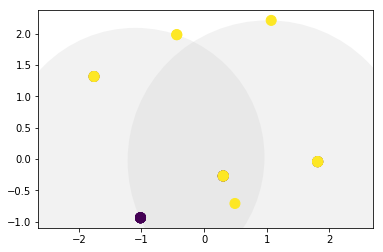

In [242]:
kmeans = KMeans(n_clusters=2, random_state=0)
plot_kmeans(kmeans, X_pca2, n_clusters=2, rseed=0, ax=None)
plt.show()

In [45]:

def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


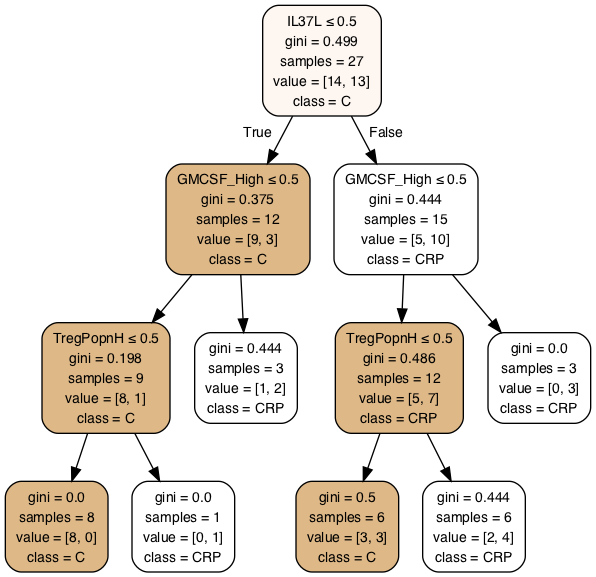

In [57]:
crps_sub=crps_mod[['GMCSF_High','IL37L','CD*PopnH','TregPopnH']]
y=crps_mod['Type']
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import collections
dtree=DecisionTreeClassifier()
dtree.fit(crps_sub,y)

dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=crps_sub.columns,
                                class_names=['C','CRP'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()
edges = graph.get_edge_list()

br1=adjust_lightness('brown')
fg1=adjust_lightness('forestgreen')

colors = ('brown', 'forestgreen')
colors = ('burlywood', 'white')

edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

Image(graph.create_png())

PCA and then cluster in 2 dimensions using kmeans

Set 3 variables

Train test split

In [268]:
#crps_mod2[['GMCSF_High','IL37L','CD*PopnH','TregPopnH']]

In [181]:
#model=LogisticRegression(random_state=0, solver='lbfgs')
#model.fit(X,y)
#print(model.coef_)

In [204]:
names=["dt","rf","LR","svc","rfgrid"]
classifiers=[DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(random_state=0, solver='lbfgs'),
            SVC(kernel="linear", C=0.025,probability=True),rfgrid]

In [218]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def repmodel(X,y,names=names,classifiers=classifiers,reps=100):
    
    
    #probs_tot=np.array([])
    
    
    for j in range(len(names)):
        auc1=0
        auc_avg=0
        probs_avg=np.array([])
        fpr_tot=np.array([])
        tpr_tot=np.array([])
    
        for i in range(reps):
            X_train, X_test, y_train, y_test = train_test_split(X_used, y_used, test_size=0.4)
            model.fit(X_train,y_train)
            #print(model.coef_)
            probs = model.predict_proba(X_test)
            if i==0:
                probs_tot=probs
            else:
                 probs_tot=probs_tot+probs
                    
            probs_avg=probs_tot/(i+1)
            if names[j]=="svc":
                probs = probs[:, 0]
            else:
                probs = probs[:, 1]
            y_vals=np.where(y_test=="CRP", 1, 0)


            auc = roc_auc_score(y_vals, probs)
            #print(auc)
            auc1=auc1+auc
            auc_avg=auc1/(i+1)
            #print(auc_avg)
            fpr, tpr, thresholds = roc_curve(y_vals, probs)
            if i==0:
                fpr_tot=fpr
                tpr_tot=tpr
            else:
                fpr_tot=np.append(fpr_tot,fpr)
                tpr_tot=np.append(tpr_tot,tpr)
            #plot_roc_curve(fpr, tpr)

        if model==svc:
            probs_mod=probs_avg[:, 0]
        else:
            probs_mod=probs_avg[:, 1]
        print(names[j])
        y_vals=np.where(y_test=="CRP", 1, 0)
        fpr, tpr, thresholds = roc_curve(y_vals, probs_mod)
        #plot_roc_curve(fpr, tpr)
        #plot_roc_curve(fpr_tot, tpr_tot)
        
        print('AUC avg: %.2f' % auc_avg)

In [222]:
print(len(X_full_s))

22


In [220]:
repmodel(X_s,y,names=names,classifiers=classifiers,reps=100)

dt
AUC avg: 0.55
rf
AUC avg: 0.56
LR
AUC avg: 0.56
svc
AUC avg: 0.43
rfgrid
AUC avg: 0.59


In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_full_s, y_full)

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_lea

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   2.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False, total=   1.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=True, total=   0.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   1.5s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=8

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.2s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   4.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   1.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   1.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimato

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [189]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [203]:
rfgrid=RandomForestClassifier({'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400})

In [133]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0])

In [ ]:
y_vals=np.where(y_test==depvar, 1, 0)
        auc_ens = roc_auc_score(y_vals, probs_ens)

In [84]:
#crps.columns

In [106]:
X=np.asarray(df.drop(["Sample","Type"], axis=1))
y=np.asarray(df['Type'])

X_dpn=np.asarray(dpn.drop(["Sample","Type"], axis=1))
y_dpn=np.asarray(dpn['Type'])


In [92]:
dfC=df[df['Type']=="C"].sample(10)
dfCR=df[df['Type']=="CRP"].sample(10)
train=df1.append(df2)
test=df[(~df['Sample'].isin(train['Sample']))]

trC=train[train['Type']=="C"].sample(6)
trCP=train[train['Type']=="CRP"].sample(6)
tr_samp=trC.append(trCP)

teC=test[test['Type']=="C"].sample(4)
teCP=test[test['Type']=="CRP"].sample(4)
te_samp=teC.append(teCP)


In [147]:
xgb_gs=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=60, n_jobs=1, nthread=4, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=None, subsample=1, verbosity=1)

names = ["XGBoost","XGB_gs",
         "Decision Tree", "Random Forest",  "AdaBoost",
         "Naive Bayes", "QDA","Log Reg","Gauss Proc","Gauss Mix"]

classifiers = [
    
    xgb.XGBClassifier(random_state=1,learning_rate=0.01),GaussianProcessClassifier(1.0 * RBF(1.0)),
    xgb_gs,
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=0, solver='lbfgs'),
    GaussianProcessClassifier(),
    GMM()
]

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
import umap
n_neighbors=5
reducer    = umap.UMAP(n_neighbors=n_neighbors,n_components=2)
X_Um = reducer.fit_transform(X)
X_Um.shape

(27, 2)

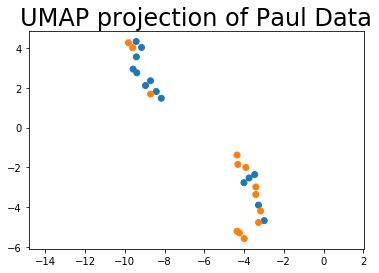

In [86]:
embedding = reducer.fit_transform(X)
embedding.shape
y_vals=np.where(y=="CRP", 1, 0)
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in y_vals])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of Paul Data', fontsize=24);
plt.show()

K means cluster

In [154]:
from sklearn.model_selection import RepeatedKFold

def ncvmodel(X,y,name="test",depvar="CRP",reps=5,n_splits=2):
    mod=np.array([])
    i=0
    random_state = 12883823
    X_m=X
    #X_Um
    #X
    
    
   
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=reps, random_state=random_state)
        
    models=np.array([])
    auc_vals=np.array([])
    for train_index, test_index in rkf.split(X):
        X_train, X_test = X_m[train_index], X_m[test_index]
        y_train, y_test = y[train_index], y[test_index]

        mod=np.array([])
        inc=np.array([])
        pbs=0
        ct=0
        i=i+1
       
        for j in range(len(names)):

            model=classifiers[j]
            modname=names[j]
            model.fit(X_train, y_train)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            y_vals=np.where(y=="CRP", 1, 0)
            auc = roc_auc_score(y_vals, probs)
            inc=np.append(inc,auc)
            mod=np.append(mod,modname)
            #pbs=np.vstack((pbs,np.ravel(np.asarray(probs))))
            #print(np.transpose(probs)
            if names[j]=="XGB_gs" or names[j]=="AdaBoost" or names[j]=="QDA" or names[j]=="Gauss Mix":
                pbs=pbs+probs
                ct=ct+1
            #ensemble voting
        #ensemble prediction
        probs_ens=pbs/ct
        y_vals=np.where(y_test==depvar, 1, 0)
        auc_ens = roc_auc_score(y_vals, probs_ens)
        mod_ens="ensemble many"
        
        #print(np.mean(pbs,axis=1))  
        auc_vals=np.append(auc_vals,inc)
        auc_vals=np.append(auc_vals,auc_ens)
        
        models=np.append(models,mod)
        models=np.append(models,mod_ens)

    testing_data = pd.DataFrame({'Model':models,'auc':auc_vals})
    
    mod_sum=pd.DataFrame(testing_data.groupby('Model').agg({'auc':['min','max','mean','std']})).reset_index()
    mod_sum.columns=['Model','AUC min','AUCmax','AUC Performance Metric','AUCstd']
    #print(testing_data.groupby('Model')['auc'].mean())
    
    print(name)

    testing_data.to_csv("%s%s" % (path,str(name)+'.csv'))
    
    with PdfPages("%s%s" % (path,str(name)+'.pdf')) as export_pdf:
        fig = plt.figure(figsize=(30,10))
        ax = sns.boxplot(x="Model",y="auc", data=testing_data)
        ax = sns.swarmplot(x="Model",y="auc", data=testing_data, color=".25")
        export_pdf.savefig()
        
        plt.show()
        plt.close()
        
        y=mod_sum['AUC Performance Metric']
        x=mod_sum['Model']
        
        mod_sum
        
        fig = plt.figure(figsize=(30,10))
        ax = sns.barplot(x=x, y=y, data=mod_sum)
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2.,
                        p.get_height()), ha = 'center', va = 'center',
                        xytext = (0, 10), textcoords = 'offset points')
        export_pdf.savefig()      
        plt.show()
        plt.close()
    return testing_data,mod_sum

#print(models)
#print(auc_vals)


In [152]:
y

array(['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP',
       'CRP', 'CRP', 'CRP', 'CRP'], dtype=object)

In [155]:
ncvmodel(X,y,name="Initial Paul Run")

ValueError: Found input variables with inconsistent numbers of samples: [27, 14]

In [112]:
ncvmodel(X_dpn,y_dpn,name="Initial Paul Run DPN",depvar="DPN")

/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/michaelallwright/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: 

ValueError: y has only 1 sample in class C, covariance is ill defined.